# Problem Statement

- This project aims at predicting house prices (residential) in Ames, Iowa, USA using advanced regression techniques.
- Train data consist of 1460 rows and 81 cols including target variable.
- Test data consist of 1459 rows and 80 cols.
- This dataset have lot of features to deal with. So, Feature Engineering comes to play.

# 1. Importing Libraries.

In [1]:
import numpy as np # Linear Algebra, Matrix operations .....etc
import pandas as pd # Data manipulation.
import seaborn as sns # Data Visualization.
import matplotlib.pyplot as plt # plots
%matplotlib inline  
#plot in jupyter notebook don't open new window for plotting.

# Future warnings ignore
import warnings
warnings.filterwarnings("ignore")

# Machine Learning API's
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error


# 2. Load data into pandas dataframe.

In [2]:
train_df=pd.read_csv("C:/Users/hp/DSproject/House/trainHouse.csv") # train data
test_df=pd.read_csv("C:/Users/hp/DSproject/House/testHouse.csv") # test data.
train_df.head() # view top rows default 5 rows get displayed.

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train_df.columns[80]

'SalePrice'

In [4]:
test_df.head() # view test data.

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train_df.shape

(1460, 81)

In [7]:
test_df.shape

(1459, 80)

# 3. Copy target variable to new variable.
# Create a dataframe for feature variables

In [8]:
target=train_df["SalePrice"].copy()
df = train_df.drop("SalePrice",axis=1) # Drop target from train dataset.

In [9]:
# check shape of features set.
df.shape

(1460, 80)

In [10]:
# Droping Id column
del df["Id"]

# 4. Check for missing values.
- Missing values treatment.

In [11]:
null_cols=df.columns[df.isna().any()] # Get cols with missing values
null_cols

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [12]:
miss_per = (df[null_cols].isna().sum()/df.shape[0]).sort_values(ascending = False)# Get percentage of missing values of each column.
miss_per = round(miss_per, 5) 
miss_per.head()

PoolQC         0.99521
MiscFeature    0.96301
Alley          0.93767
Fence          0.80753
FireplaceQu    0.47260
dtype: float64

In [13]:
null=pd.DataFrame({"Features":miss_per.index,"percentage":miss_per.values}) # create data frame  for barplot.

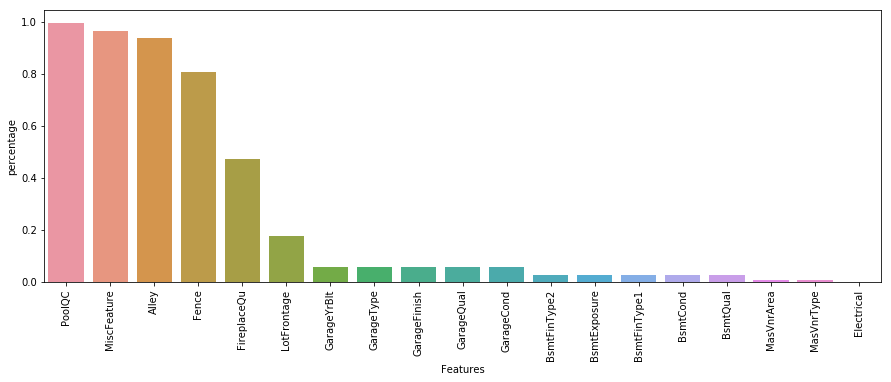

In [14]:
plt.figure(figsize=(15,5)) # set width and height for plot
sns.barplot(x=null.columns[0],y=null.columns[1],data=null)
plt.xticks(rotation = 90) # Prevent labels from overlapping.
plt.show()

- PoolQC Followed by MiscFeature and Alley, Fence features having highest percentage of missing values above 50%. 

In [15]:
# Drop features with 50% values missing in it.
df.dropna(thresh=int(0.5*len(df)),inplace=True,axis=1)


In [16]:
df.shape # shape after dropping cols.

(1460, 75)

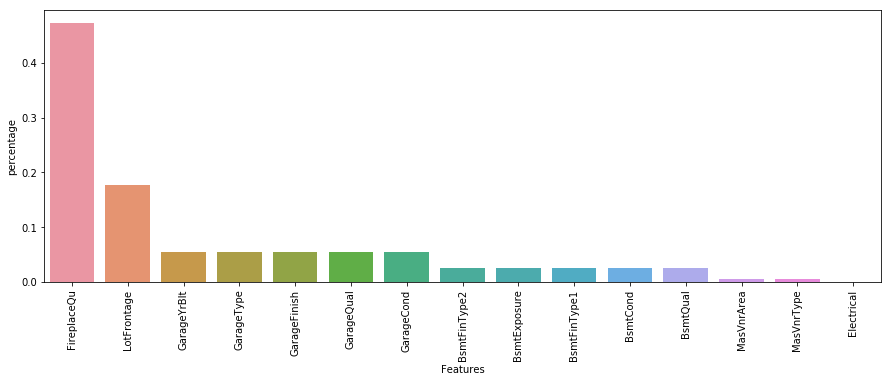

In [17]:
rem_null=null[4:]# Get remaining missing values which are less than 50%.
plt.figure(figsize=(15,5)) # set width and height for plot
sns.barplot(x=rem_null.columns[0],y=rem_null.columns[1],data=rem_null)
plt.xticks(rotation = 90) # Prevent labels from overlapping.
plt.show()

# 5. Impute the missing values 


# Imputing numeric features.

In [18]:
# Get numeric features and store into new variable
numeric_features=df.select_dtypes(include=np.number)
numeric_features.shape

(1460, 36)

In [19]:
numeric_features.dtypes.value_counts() # check dtypes.

int64      33
float64     3
dtype: int64

In [20]:
i = 0
for col in numeric_features.columns.values:
    
    a = df[col].mean()
    b = df[col].median()
    
    if  b == 0:
        print (col, 'mean :', a, 'median:', b)
    elif a/b > 1.2 :
        print (col, 'mean is bigger:', a, 'median:', b)
    elif a/b < .8 :
        print (col, 'mean :', a, 'median is bigger:', b)
    else :
        continue

MasVnrArea mean : 103.68526170798899 median: 0.0
BsmtFinSF2 mean : 46.54931506849315 median: 0.0
2ndFlrSF mean : 346.99246575342465 median: 0.0
LowQualFinSF mean : 5.844520547945206 median: 0.0
BsmtFullBath mean : 0.42534246575342466 median: 0.0
BsmtHalfBath mean : 0.057534246575342465 median: 0.0
FullBath mean : 1.5650684931506849 median is bigger: 2.0
HalfBath mean : 0.38287671232876713 median: 0.0
Fireplaces mean : 0.613013698630137 median is bigger: 1.0
WoodDeckSF mean : 94.2445205479452 median: 0.0
OpenPorchSF mean is bigger: 46.66027397260274 median: 25.0
EnclosedPorch mean : 21.954109589041096 median: 0.0
3SsnPorch mean : 3.4095890410958902 median: 0.0
ScreenPorch mean : 15.060958904109588 median: 0.0
PoolArea mean : 2.758904109589041 median: 0.0
MiscVal mean : 43.489041095890414 median: 0.0


In [21]:
for col in numeric_features.columns.values:
    
    median = df[col].median()
    
    df[col] = df[col].fillna(median)
 

# Imputing categorical columns.

In [22]:
# Check for missingness count
cate_features=df.select_dtypes(exclude=np.number)
cate_cols=cate_features.columns[cate_features.isna().any()]
#cate_per=round(df[cate_cols].isna().agg("mean").sort_values(ascending=False),5) # Get percentage of missing values of each column.
cate_per=round((df[cate_cols].isna().sum()/df.shape[0]).sort_values(ascending=False),5)
cate_per

FireplaceQu     0.47260
GarageCond      0.05548
GarageQual      0.05548
GarageFinish    0.05548
GarageType      0.05548
BsmtFinType2    0.02603
BsmtExposure    0.02603
BsmtFinType1    0.02534
BsmtCond        0.02534
BsmtQual        0.02534
MasVnrType      0.00548
Electrical      0.00068
dtype: float64

In [23]:
cate_na_sum = cate_features[cate_cols].isna().sum().sort_values(ascending = False)
cate_na_sum


FireplaceQu     690
GarageCond       81
GarageQual       81
GarageFinish     81
GarageType       81
BsmtFinType2     38
BsmtExposure     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrType        8
Electrical        1
dtype: int64

In [25]:
#mode imputation for category columns having less than 100 rows with missing values
cols = cate_na_sum[cate_na_sum.values < 100].index

for col in cols:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [26]:
#impute with value 'Missing' (690 rows with missing value)
df["FireplaceQu"]=df["FireplaceQu"].fillna("Missing")

In [27]:
df["FireplaceQu"].value_counts()

Missing    690
Gd         380
TA         313
Fa          33
Ex          24
Po          20
Name: FireplaceQu, dtype: int64

In [28]:
df[cate_cols].isna().sum()

MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

# 6. Data exploration

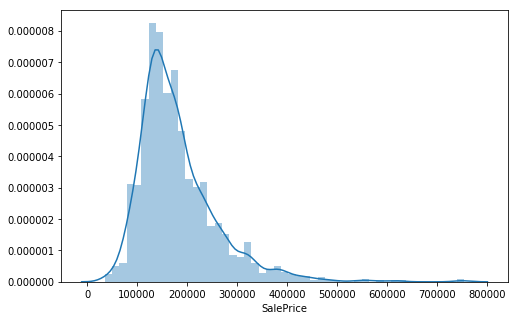

In [29]:
# check distribution of target variable.
plt.figure(figsize=(8,5))
sns.distplot(target)

- It is right skewed or positive skewed. 
- Check skewness of target feature.

In [30]:
target.skew() # skewness

1.8828757597682129

0.12133506220520406

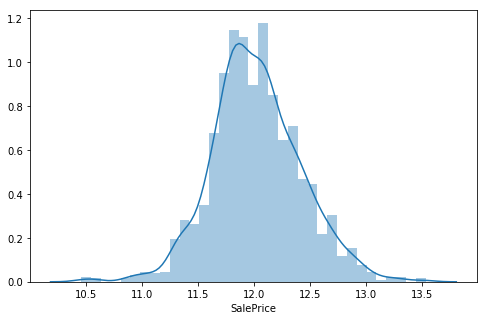

In [31]:
# converting right skewed to normal distribution (or) close to normal.
plt.figure(figsize=(8,5))
sns.distplot(np.log(target))
np.log(target).skew()

> Converting target from right skewed to normal will helps model to map relationship between independent variables to target variable. 

# 7. Relation with target variable

In [32]:
dff=pd.concat([df,target],axis=1)

dff.shape

(1460, 76)

In [33]:
(dff.isnull().sum() > 0).sum()

0

(1460, 76)

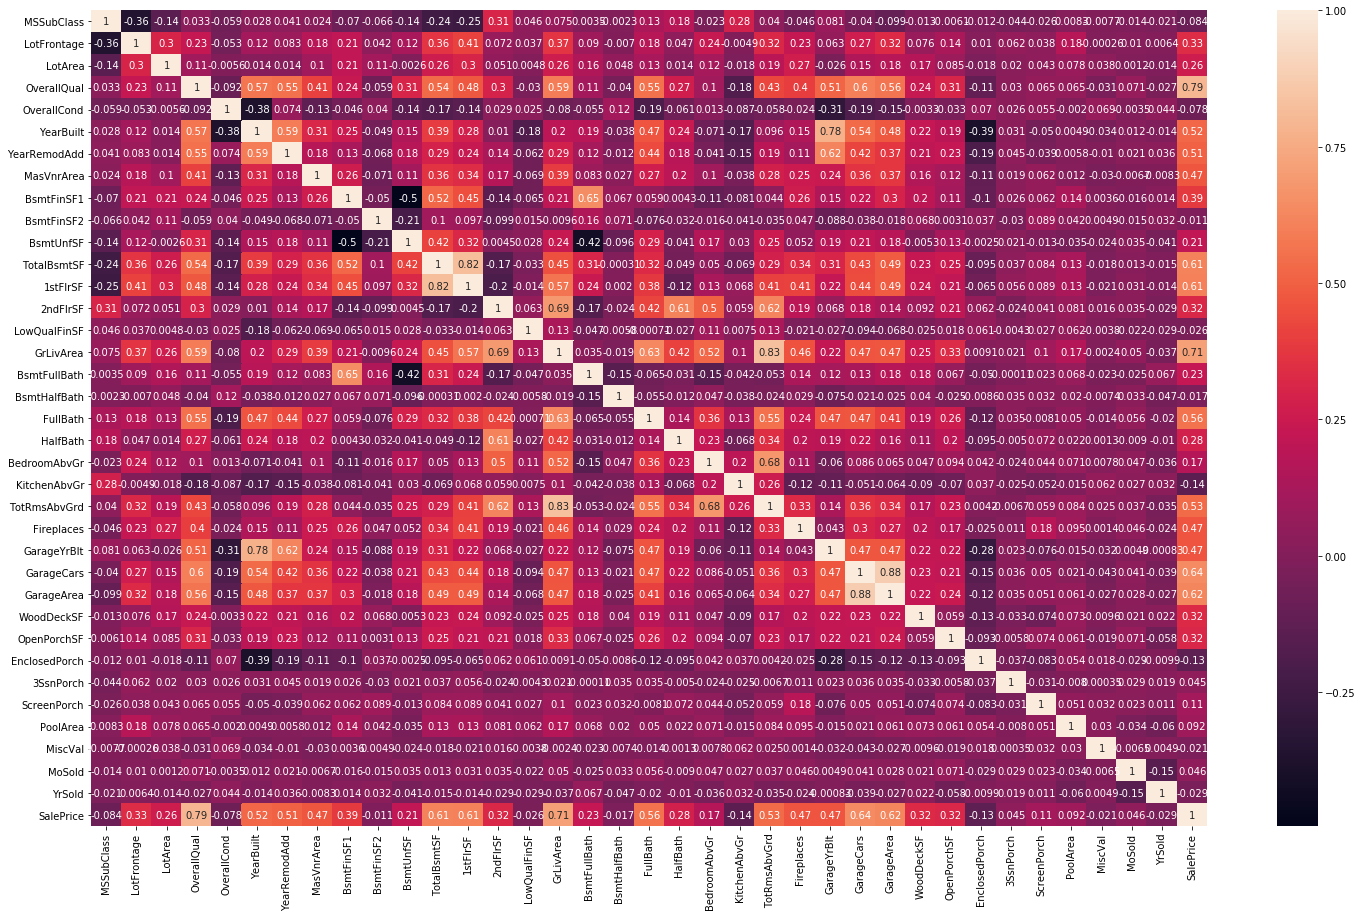

In [34]:
plt.figure(figsize=(25,15))
corr=dff.corr()
sns.heatmap(corr,annot=True)
dff.shape

In [39]:
corr.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,0.042463,...,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771
LotArea,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856


In [43]:
print (corr['SalePrice'].sort_values(ascending=False)[:20]) #top 20 values
print ('----------------------')
print (corr['SalePrice'].sort_values(ascending=False)[-5:]) #last 5 values`

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
Fireplaces      0.466929
GarageYrBlt     0.466754
BsmtFinSF1      0.386420
LotFrontage     0.334771
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
Name: SalePrice, dtype: float64
----------------------
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [44]:
corr['SalePrice'].sort_values(ascending = False)[30:].index

Index(['MiscVal', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass',
       'EnclosedPorch', 'KitchenAbvGr'],
      dtype='object')

# Building Model

In [45]:
from sklearn.model_selection import train_test_split
from sklearn import metrics 

In [46]:
X = df[numeric_features.columns]
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.3, random_state = 0)
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
y_pred = lr.predict(X_test)
print('MAPE :', metrics.mean_absolute_error(y_test, y_pred))
print('MSE :',metrics.mean_squared_error(y_test, y_pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAPE : 21795.298978736922
MSE : 1901953535.7971177
RMSE :  43611.39227079454


In [48]:
from sklearn.metrics import r2_score
coefficient_of_dermination = r2_score(y_test, y_pred)
coefficient_of_dermination

0.7198474099818116

In [49]:
y_pred_train = lr.predict(X_train)
coefficient_of_dermination = r2_score(y_train, y_pred_train)
coefficient_of_dermination

0.842104947023918

# Outlier Treatment

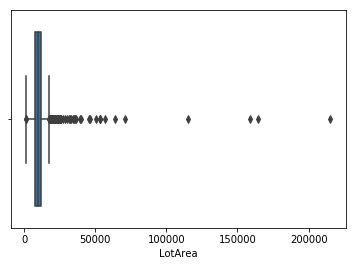

In [50]:
sns.boxplot(df['LotArea'])

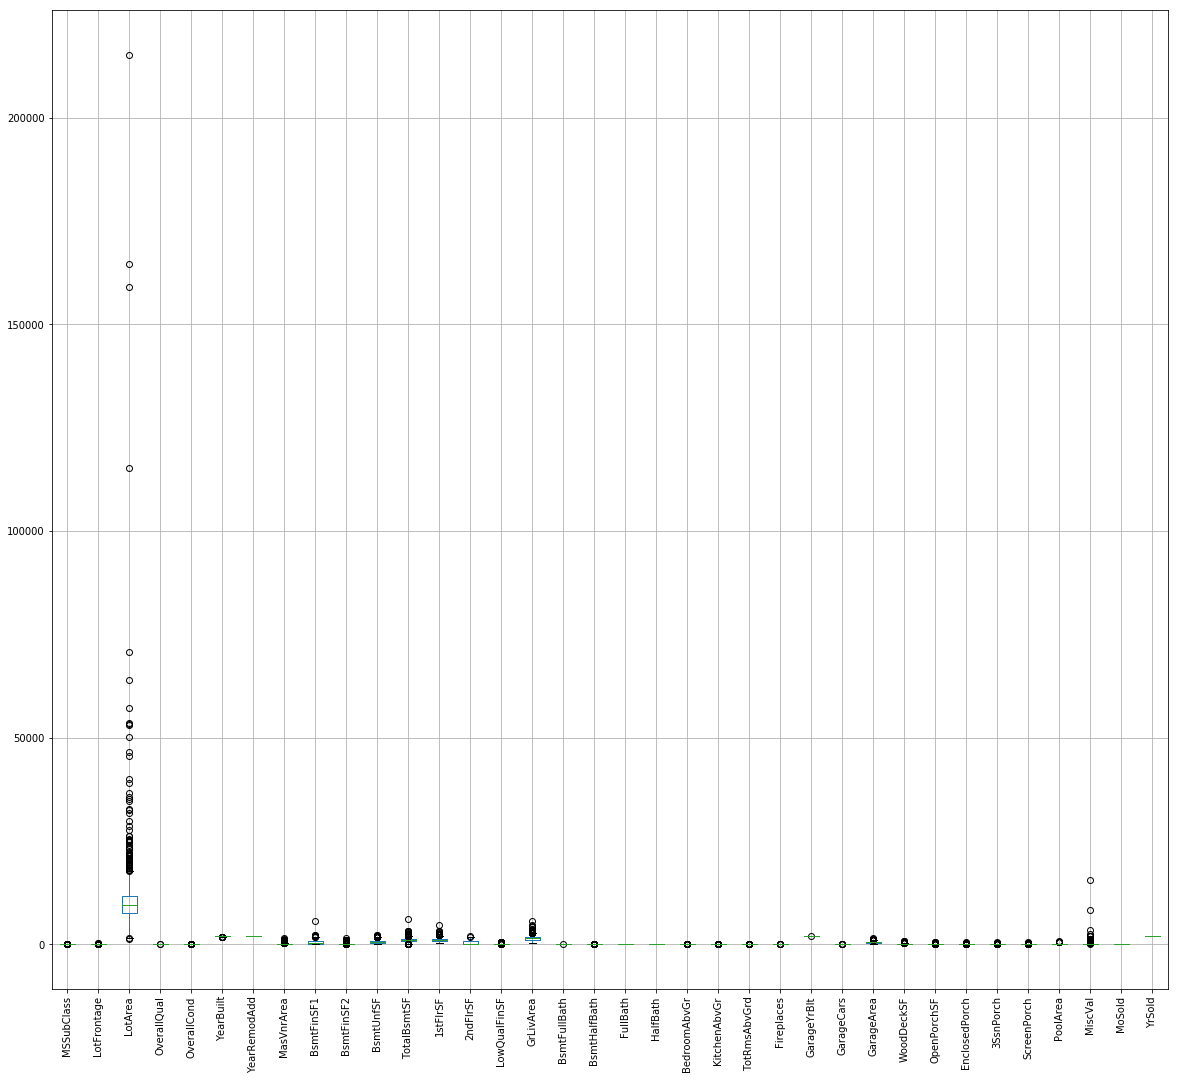

In [51]:
df.boxplot(figsize=(20,18))
plt.xticks(rotation = 90) # Prevent labels from overlapping.
plt.show()

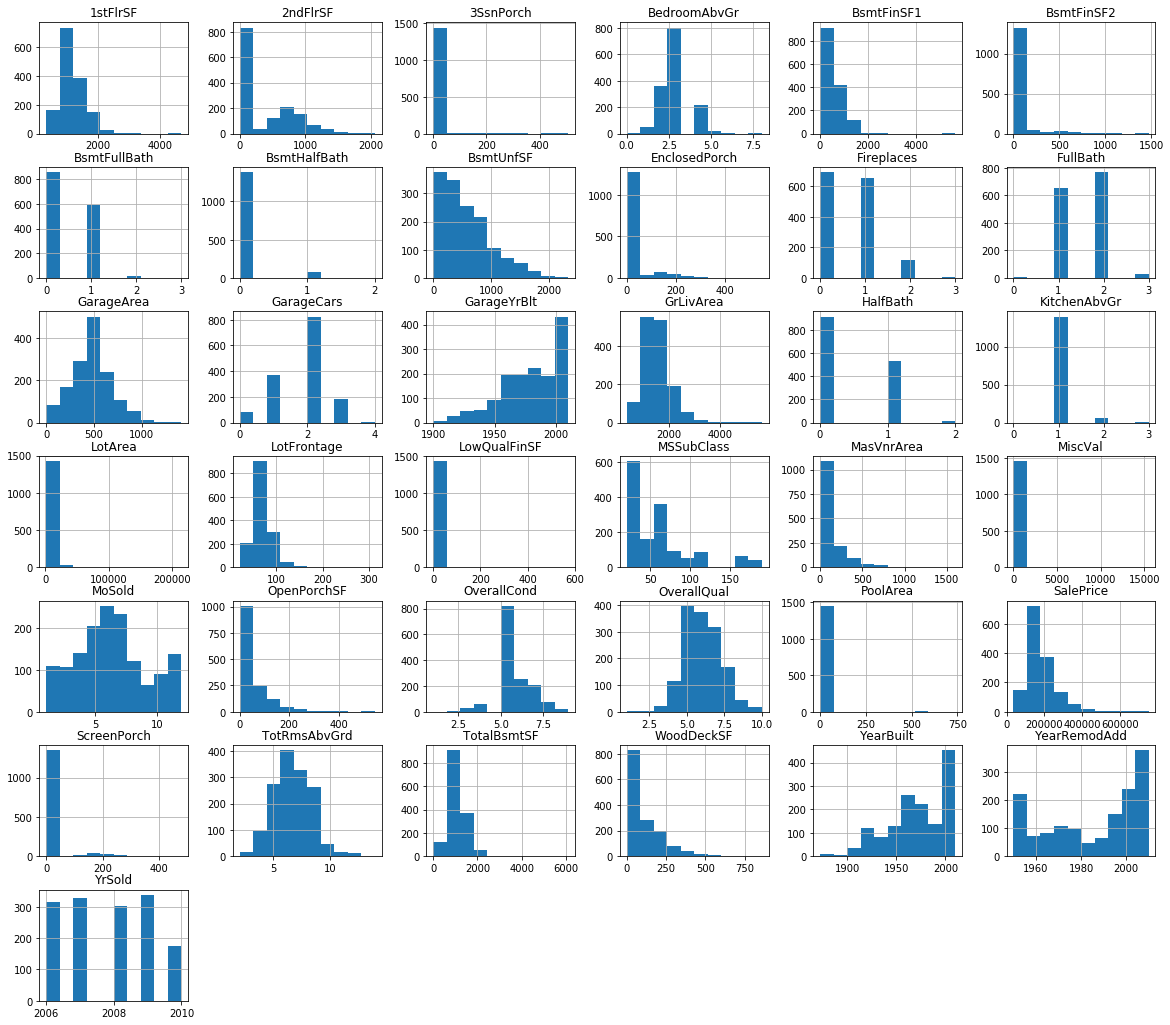

In [52]:
dff.hist(figsize=(20,18))
plt.show()

In [53]:
for col in numeric_features.columns.values:
    upper = df[col].quantile(.99)
    lower = df[col].quantile(.01)
    df[col] = df[col].clip(upper = upper, lower = lower)
    

In [54]:
X1 = df[numeric_features.columns]
X_train, X_test, y_train, y_test = train_test_split(X1, target, test_size = 0.3, random_state = 0)
lr1 = LinearRegression()
lr1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
y_pred = lr1.predict(X_test)
print('MAPE :', metrics.mean_absolute_error(y_test, y_pred))
print('MSE :',metrics.mean_squared_error(y_test, y_pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAPE : 21524.237918708575
MSE : 1353266601.6234705
RMSE :  36786.772101170696


In [56]:
coefficient_of_dermination = r2_score(y_test, y_pred)
coefficient_of_dermination

0.8006675051233385

In [57]:
y_pred_train = lr1.predict(X_train)
coefficient_of_dermination = r2_score(y_train, y_pred_train)
coefficient_of_dermination

0.8451539651312925

# model using log transformed target 

In [58]:
X2 = df[numeric_features.columns]
target2 = np.log(target)
X_train, X_test, y_train, y_test = train_test_split(X2, target2, test_size = 0.3, random_state = 0)
lr2 = LinearRegression()
lr2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
y_pred = lr2.predict(X_test)
print('MAPE :', metrics.mean_absolute_error(y_test, y_pred))
print('MSE :',metrics.mean_squared_error(y_test, y_pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAPE : 0.09203293026880918
MSE : 0.020263569425354518
RMSE :  0.1423501648237701


In [60]:
coefficient_of_dermination = r2_score(y_test, y_pred)
coefficient_of_dermination

0.8688536626157063

In [61]:
y_pred_train = lr2.predict(X_train)
coefficient_of_dermination = r2_score(y_train, y_pred_train)
coefficient_of_dermination

0.8926420566602423

# Dropping few features from the model

In [62]:
corr['SalePrice'].sort_values(ascending = False)[30:].index

Index(['MiscVal', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass',
       'EnclosedPorch', 'KitchenAbvGr'],
      dtype='object')

In [63]:
col_drop = []
for col in numeric_features.columns.values:
    if col in (corr['SalePrice'].sort_values(ascending = False)[30:].index):
        col_drop.append(col)
    else:
        continue
list(col_drop)

['MSSubClass',
 'OverallCond',
 'LowQualFinSF',
 'KitchenAbvGr',
 'EnclosedPorch',
 'MiscVal',
 'YrSold']

In [64]:
X3 = X2.drop(['MSSubClass',
 'OverallCond',
 'LowQualFinSF',
 'KitchenAbvGr',
 'EnclosedPorch',
 'MiscVal',
 'YrSold'], axis = 1)

In [65]:
target3 = np.log(target)
X_train, X_test, y_train, y_test = train_test_split(X3, target3, test_size = 0.3, random_state = 0)
lr3 = LinearRegression()
lr3.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
y_pred = lr3.predict(X_test)
print('MAPE :', metrics.mean_absolute_error(y_test, y_pred))
print('MSE :',metrics.mean_squared_error(y_test, y_pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAPE : 0.09814530228780141
MSE : 0.02222826004987996
RMSE :  0.14909144861419774


In [67]:
coefficient_of_dermination = r2_score(y_test, y_pred)
coefficient_of_dermination

0.8561381348579274

In [68]:
y_pred_train = lr3.predict(X_train)
coefficient_of_dermination = r2_score(y_train, y_pred_train)
coefficient_of_dermination

0.8734017177979655

# Include categorical columns in the model

In [69]:
df4 = df.drop(['MSSubClass',
 'OverallCond',
 'LowQualFinSF',
 'KitchenAbvGr',
 'EnclosedPorch',
 'MiscVal',
 'YrSold'], axis = 1)
df4.shape

(1460, 68)

In [70]:
df4 = pd.get_dummies(df4, drop_first= True)

In [71]:
df4.select_dtypes(exclude = np.number).columns

Index([], dtype='object')

In [72]:
target4 = np.log(target)
X_train, X_test, y_train, y_test = train_test_split(df4, target4, test_size = 0.3, random_state = 0)
lr4 = LinearRegression()
lr4.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
y_pred = lr4.predict(X_test)
print('MAPE :', metrics.mean_absolute_error(y_test, y_pred))
print('MSE :',metrics.mean_squared_error(y_test, y_pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAPE : 0.09677630801639157
MSE : 0.027136742307405124
RMSE :  0.16473233534253415


In [74]:
y_pred_train = lr4.predict(X_train)
coefficient_of_dermination = r2_score(y_train, y_pred_train)
coefficient_of_dermination

0.9488183761152083

In [75]:
coefficient_of_dermination = r2_score(y_test, y_pred)
coefficient_of_dermination

0.8243703126802239